---
title: Feature Selection - S&P500
author: Rachna, Amina, Lizzie, Sophia

format: 
    html: 
        embed-resources: true
        code-fold: true
        toc: true
---

## Preprocessing

In [85]:
library(dplyr)
library(tidyverse)
library(caret)
library(leaps)
suppressWarnings(require(glmnet))

Loading required package: glmnet

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-8



In [61]:
df <- read.csv("merged_data/merged.csv")
df <- subset(df, !is.na(Open))
df <- subset(df, !is.na(IMDB.Rating))
df <- df |>
  pivot_wider(
    names_from = Stock,      # The column to use for the new column names
    values_from = Stock,     # The values to fill in the new columns
    values_fn = length,      # Use length to count occurrences of each stock
    values_fill = list(Stock = 0)  # Fill with 0 where there is no occurrence
  )
df$Box.Office <- as.numeric(gsub("[$,]", "", df$Box.Office))
df <- na.omit(df)
names(df)[names(df) == "^SPX"] <- "SPX"


head(df)
str(df)


X,Date,Open,High,Low,Close,Adj.Close,Volume,Title,Year,...,MASI,ENPH,VOYA,WIX,SAGE,KEYS,YETI,UBER,FOUR,INFA
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
42,1950-02-01,17.05,17.05,17.05,17.05,17.05,1810000,The Third Man,1949,...,0,0,0,0,0,0,0,0,0,0
227,1950-10-27,19.77,19.77,19.77,19.77,19.77,1800000,All About Eve,1950,...,0,0,0,0,0,0,0,0,0,0
588,1952-04-10,24.11,24.11,24.11,24.11,24.11,1130000,Singin' in the Rain,1952,...,0,0,0,0,0,0,0,0,0,0
794,1953-02-05,26.15,26.15,26.15,26.15,26.15,1900000,Peter Pan,1953,...,0,0,0,0,0,0,0,0,0,0
2134,1958-05-28,43.85,43.85,43.85,43.85,43.85,2260000,Vertigo,1958,...,0,0,0,0,0,0,0,0,0,0
2302,1959-01-29,55.20,55.20,55.20,55.20,55.20,3470000,Sleeping Beauty,1959,...,0,0,0,0,0,0,0,0,0,0


tibble [32,221 x 59] (S3: tbl_df/tbl/data.frame)
 $ X          : int [1:32221] 42 227 588 794 2134 2302 2506 2527 2660 3628 ...
 $ Date       : chr [1:32221] "1950-02-01" "1950-10-27" "1952-04-10" "1953-02-05" ...
 $ Open       : num [1:32221] 17.1 19.8 24.1 26.1 43.9 ...
 $ High       : num [1:32221] 17.1 19.8 24.1 26.1 43.9 ...
 $ Low        : num [1:32221] 17.1 19.8 24.1 26.1 43.9 ...
 $ Close      : num [1:32221] 17.1 19.8 24.1 26.1 43.9 ...
 $ Adj.Close  : num [1:32221] 17.1 19.8 24.1 26.1 43.9 ...
 $ Volume     : num [1:32221] 1810000 1800000 1130000 1900000 2260000 ...
 $ Title      : chr [1:32221] "The Third Man" "All About Eve" "Singin' in the Rain" "Peter Pan" ...
 $ Year       : chr [1:32221] "1949" "1950" "1952" "1953" ...
 $ Genre      : chr [1:32221] "Drama, Film-Noir, Mystery" "Drama" "Comedy, Musical, Romance" "Animation, Adventure, Family" ...
 $ Runtime    : chr [1:32221] "93 min" "138 min" "103 min" "77 min" ...
 $ Director   : chr [1:32221] "Carol Reed" "Joseph L. M

# Stepwise Selection

In [ ]:
formula <- as.formula("Box.Office ~ SPX + XOM + DIS + PFE + HUBB + BIO + CMCSA +
                        ZION + AAPL + T + BBY + RGEN + ORCL + FCNCA +
                        CERN + TECH + QCOM + JBL + NATI + NFLX + GOOG +
                        DISCA + VIAC + LDOS + MASI + ENPH + VOYA + WIX +
                        SAGE + KEYS + YETI + UBER + FOUR + INFA + Open + High + Low + Adj.Close + Volume")

#formula <- as.formula("Box.Office ~ .")

## Forward

### Selection

In [60]:
regfit.full=regsubsets(formula, data = df, method = "forward", nvmax = 39)
reg.summary=summary(regfit.full)
print(reg.summary)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"1  linear dependencies found"


Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
"number of items to replace is not a multiple of replacement length"


Subset selection object
Call: regsubsets.formula(formula, data = df, method = "forward", nvmax = 39)
39 Variables  (and intercept)
          Forced in Forced out
SPX           FALSE      FALSE
XOM           FALSE      FALSE
DIS           FALSE      FALSE
PFE           FALSE      FALSE
HUBB          FALSE      FALSE
BIO           FALSE      FALSE
CMCSA         FALSE      FALSE
ZION          FALSE      FALSE
AAPL          FALSE      FALSE
T             FALSE      FALSE
BBY           FALSE      FALSE
RGEN          FALSE      FALSE
ORCL          FALSE      FALSE
FCNCA         FALSE      FALSE
CERN          FALSE      FALSE
TECH          FALSE      FALSE
QCOM          FALSE      FALSE
JBL           FALSE      FALSE
NATI          FALSE      FALSE
NFLX          FALSE      FALSE
GOOG          FALSE      FALSE
DISCA         FALSE      FALSE
VIAC          FALSE      FALSE
LDOS          FALSE      FALSE
MASI          FALSE      FALSE
ENPH          FALSE      FALSE
VOYA          FALSE      FALSE
W

### Metrics

[1] "Optimal R2 Features: 27"

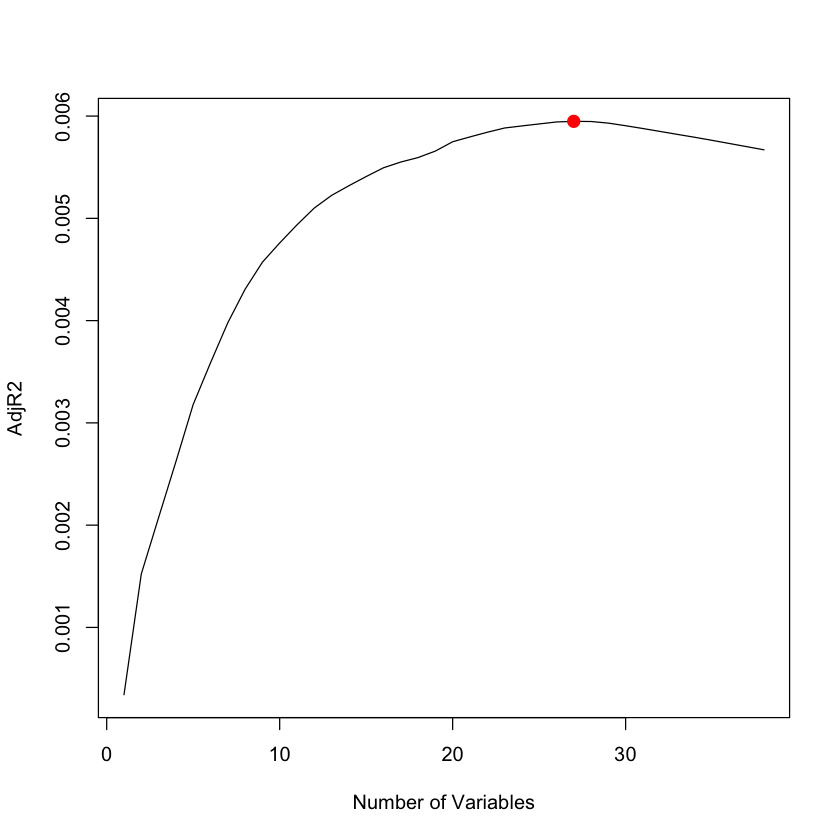

In [71]:
m = which.max(reg.summary$adjr2)
plot(reg.summary$adjr2, xlab = "Number of Variables", ylab = "AdjR2", type = "l")
points(m, reg.summary$adjr2[m], col = "red", cex = 2, pch = 20)
paste0("Optimal R2 Features: ", m)

[1] "Optimal BIC Features: 8"

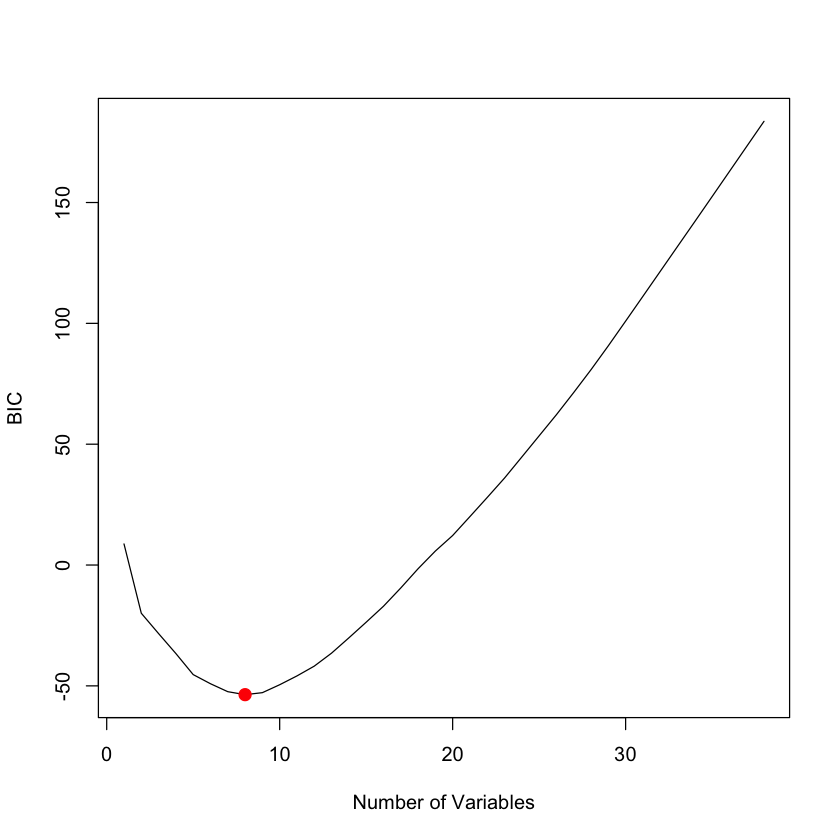

In [76]:
m = which.min(reg.summary$bic)
plot(reg.summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l")
points(m, reg.summary$bic[m], col = "red", cex = 2, pch = 20)
paste0("Optimal BIC Features: ", m)


[1] "Optimal Cp Features: 23"

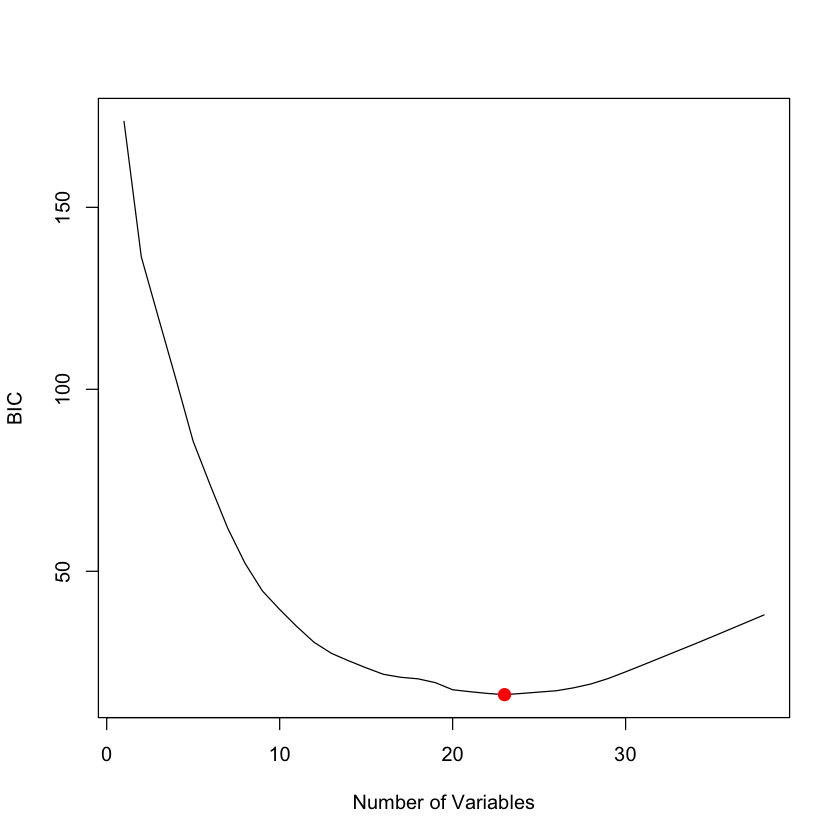

In [77]:
m = which.min(reg.summary$cp)
plot(reg.summary$cp, xlab = "Number of Variables", ylab = "BIC", type = "l")
points(m, reg.summary$cp[m], col = "red", cex = 2, pch = 20)
paste0("Optimal Cp Features: ", m)

## Backward


### Selection

In [62]:
regfit.full=regsubsets(formula, data = df, method = "backward", nvmax = 39)
reg.summary=summary(regfit.full)
print(reg.summary)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"1  linear dependencies found"


Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
"number of items to replace is not a multiple of replacement length"


Subset selection object
Call: regsubsets.formula(formula, data = df, method = "backward", nvmax = 39)
39 Variables  (and intercept)
          Forced in Forced out
SPX           FALSE      FALSE
XOM           FALSE      FALSE
DIS           FALSE      FALSE
PFE           FALSE      FALSE
HUBB          FALSE      FALSE
BIO           FALSE      FALSE
CMCSA         FALSE      FALSE
ZION          FALSE      FALSE
AAPL          FALSE      FALSE
T             FALSE      FALSE
BBY           FALSE      FALSE
RGEN          FALSE      FALSE
ORCL          FALSE      FALSE
FCNCA         FALSE      FALSE
CERN          FALSE      FALSE
TECH          FALSE      FALSE
QCOM          FALSE      FALSE
JBL           FALSE      FALSE
NATI          FALSE      FALSE
NFLX          FALSE      FALSE
GOOG          FALSE      FALSE
DISCA         FALSE      FALSE
VIAC          FALSE      FALSE
LDOS          FALSE      FALSE
MASI          FALSE      FALSE
ENPH          FALSE      FALSE
VOYA          FALSE      FALSE


### Metrics

[1] "Optimal R2 Features: 27"

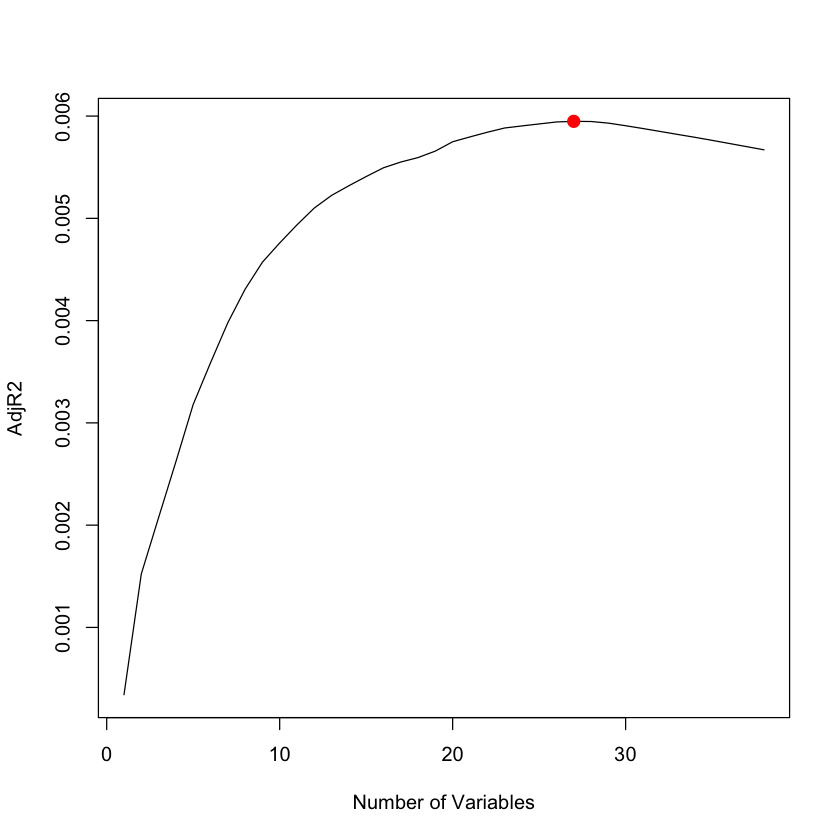

In [78]:
m = which.max(reg.summary$adjr2)
plot(reg.summary$adjr2, xlab = "Number of Variables", ylab = "AdjR2", type = "l")
points(m, reg.summary$adjr2[m], col = "red", cex = 2, pch = 20)
paste0("Optimal R2 Features: ", m)

[1] "Optimal BIC Features: 8"

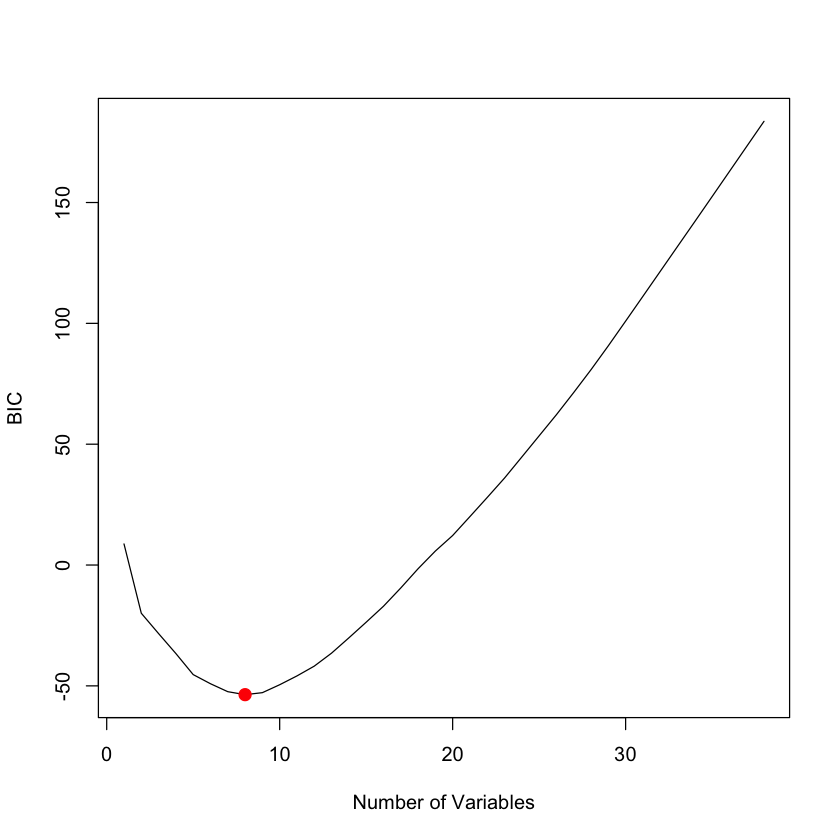

In [79]:
m = which.min(reg.summary$bic)
plot(reg.summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l")
points(m, reg.summary$bic[m], col = "red", cex = 2, pch = 20)
paste0("Optimal BIC Features: ", m)

[1] "Optimal Cp Features: 23"

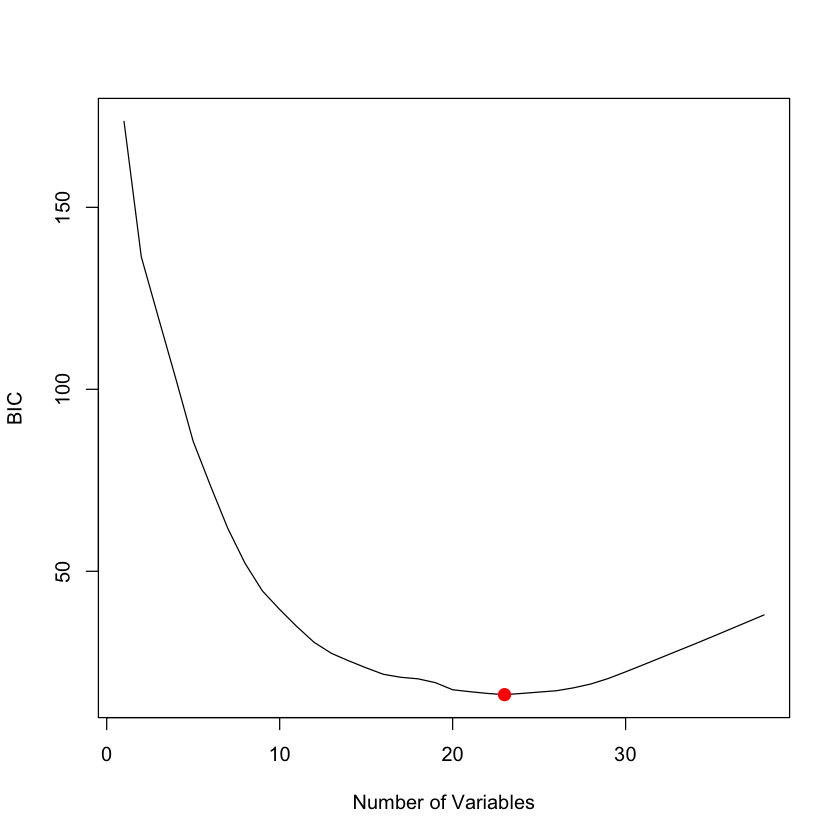

In [80]:
m = which.min(reg.summary$cp)
plot(reg.summary$cp, xlab = "Number of Variables", ylab = "BIC", type = "l")
points(m, reg.summary$cp[m], col = "red", cex = 2, pch = 20)
paste0("Optimal Cp Features: ", m)

## Full

### Selection

In [63]:
regfit.full=regsubsets(formula, data = df, nvmax = 39)
reg.summary=summary(regfit.full)
print(reg.summary)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"1  linear dependencies found"


Reordering variables and trying again:
Subset selection object
Call: regsubsets.formula(formula, data = df, nvmax = 39)
39 Variables  (and intercept)
          Forced in Forced out
SPX           FALSE      FALSE
XOM           FALSE      FALSE
DIS           FALSE      FALSE
PFE           FALSE      FALSE
HUBB          FALSE      FALSE
BIO           FALSE      FALSE
CMCSA         FALSE      FALSE
ZION          FALSE      FALSE
AAPL          FALSE      FALSE
T             FALSE      FALSE
BBY           FALSE      FALSE
RGEN          FALSE      FALSE
ORCL          FALSE      FALSE
FCNCA         FALSE      FALSE
CERN          FALSE      FALSE
TECH          FALSE      FALSE
QCOM          FALSE      FALSE
JBL           FALSE      FALSE
NATI          FALSE      FALSE
NFLX          FALSE      FALSE
GOOG          FALSE      FALSE
DISCA         FALSE      FALSE
VIAC          FALSE      FALSE
LDOS          FALSE      FALSE
MASI          FALSE      FALSE
ENPH          FALSE      FALSE
VOYA         

### Metrics

[1] "Optimal R2 Features: 27"

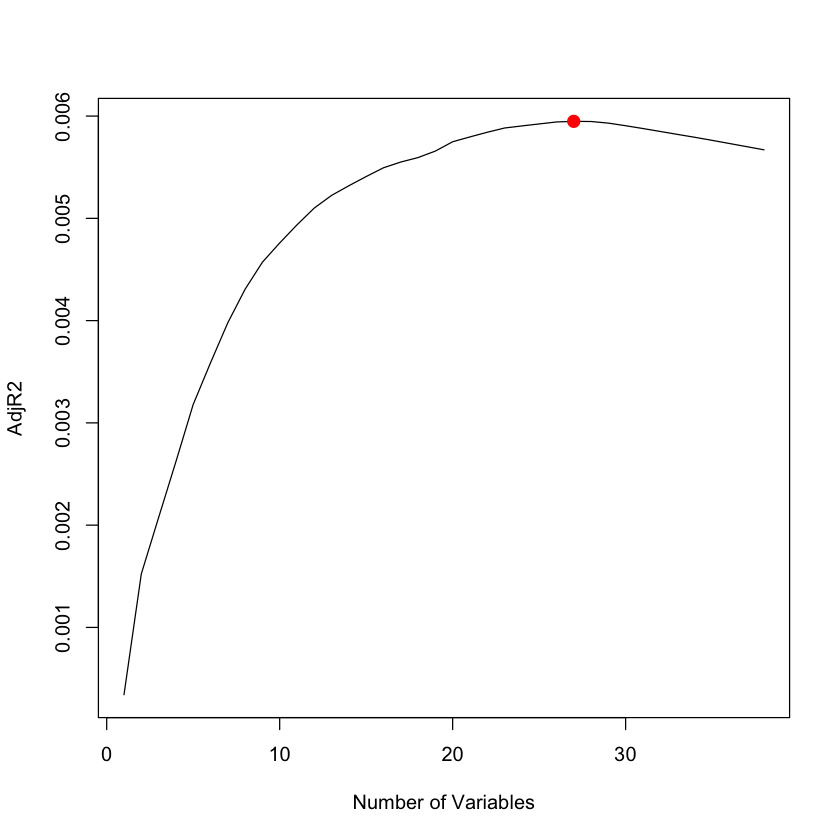

In [82]:
m = which.max(reg.summary$adjr2)
plot(reg.summary$adjr2, xlab = "Number of Variables", ylab = "AdjR2", type = "l")
points(m, reg.summary$adjr2[m], col = "red", cex = 2, pch = 20)
paste0("Optimal R2 Features: ", m)

[1] "Optimal BIC Features: 8"

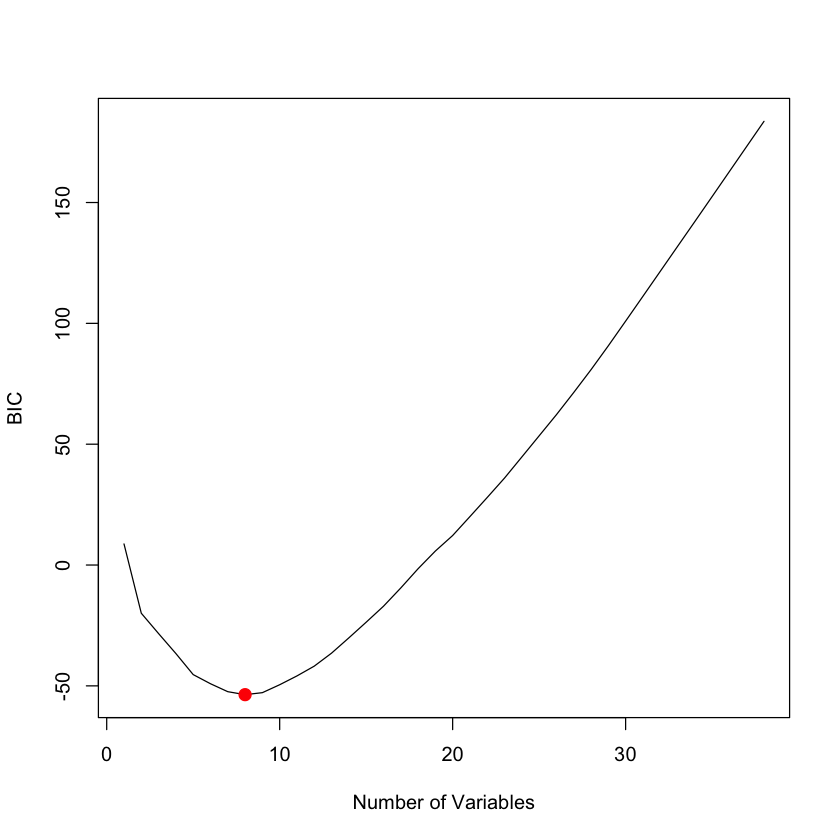

In [83]:
m = which.min(reg.summary$bic)
plot(reg.summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l")
points(m, reg.summary$bic[m], col = "red", cex = 2, pch = 20)
paste0("Optimal BIC Features: ", m)

[1] "Optimal Cp Features: 23"

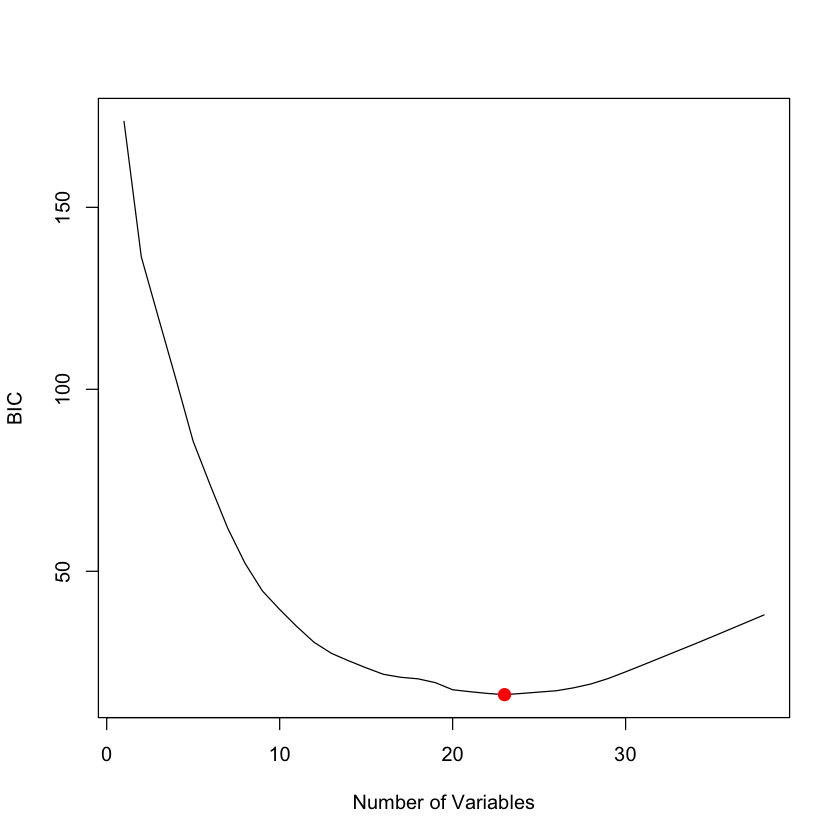

In [81]:
m = which.min(reg.summary$cp)
plot(reg.summary$cp, xlab = "Number of Variables", ylab = "BIC", type = "l")
points(m, reg.summary$cp[m], col = "red", cex = 2, pch = 20)
paste0("Optimal Cp Features: ", m)

# LASSO

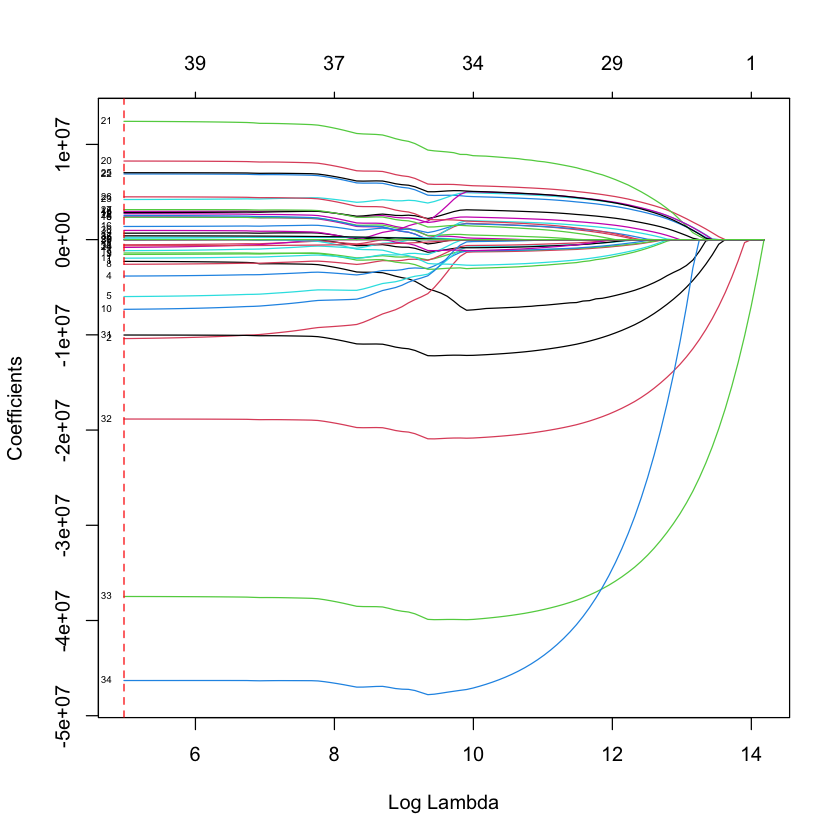

In [96]:
columns_needed <- all.vars(formula)[-1] 
x <- df[, columns_needed]

y <- df$Box.Office
lasso_model <- glmnet(x, y, alpha = 1)

for (lambda_val in lasso_model$lambda) {
  coef_lasso <- coef(lasso_model, s = lambda_val)
  non_zero_coeffs <- sum(coef_lasso != 0) - 1
  if (non_zero_coeffs == 8) {
    print(paste("Lambda when 10 coefficients are non-zero:", lambda_val))
    print(coef_lasso)
    break
  }
}

plot(lasso_model, xvar = "lambda", label = TRUE)
abline(v = log(lambda_val), col = "red", lty = 2)

In [93]:
lasso_model <- cv.glmnet(x, y, alpha = 1, nfolds = 10)
lambda_1se <- lasso_model$lambda.1se
paste0("Lambda at 1SE value: ", lambda_1se)

error_1se <- lasso_model$cvm[lasso_model$lambda == lambda_1se]
paste0("Cross-validation estimate for residual standard error (CV error) at 1SE lambda: 0", error_1se)

[1] "Lambda at 1SE value: 5374051.10981875"

[1] "Cross-validation estimate for residual standard error (CV error) at 1SE lambda: 05576593281436714"

# Conclusions

Considering all of the selection methods yielded the same optimal number of features for each method, we focused on the full subset selection to determine which features were most important. The three important metrics tell us that the best number of features is either 8, 23, or 27. The features selected for each number is as follows: 

8: XOM, HUBB, T, NTFLX, GOOG, Low, Adj.Close, and Volume

23:  ^SPX, XOM, DIS, PFE, HUBB, ZION, APPL, T, BBY, FCNCA, QCOM, NTFLX, GOOG, DISCA, LDOS, MASI, YETI, UBER, FOUR, High, Low, Adj.Close, Volume

27: ^SPX, XOM, DIS, PFE, HUBB, ZION, APPL, T, BBY, FCNCA, CMCSA, ORCL, QCOM, NTFLX, GOOG, DISCA, LDOS, MASI, YETI, UBER, FOUR, INFA, Open, High, Low, Adj.Close, Volume

When we took a look at the LASSO coefficients with the movie data, the 8 most important were deemed to be: Volume, IMDB Rating, MetaScore, NTFLX, VIAC, YETI, UBER, and FOUR. 